In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Python 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리 #데이터 시각화 라이브러리
import seaborn as sns #데이터 시각화 라이브러리 #matplotlib 보다 간편하고 이쁨

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno #데이터셋에 널데이터를 쉽게 보여주는 라이브러리 #pip install missingno

import warnings
warnings.filterwarnings('ignore') #경고창 숨기기

print('success setting')

success setting


In [2]:
#데이터 가져오기
df_train = pd.read_csv('./data/train.csv') 
df_test=pd.read_csv('./data/test.csv')

[가져온데이터 확인작업]

In [3]:
df_train.head() #표의 앞 5줄 가져오기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe() #데이터표의 간단한정보 데이터 확인(train.csv)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()#데이터표의 간단한정보 데이터 확인(test.csv)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df_train.shape #데이터 형태보기 #Column 12개 row 891개

(891, 12)

In [7]:
# 모든 칼럼 null값의 퍼센테이지 (null 데이터가 얼마나 있는지 확인)) - train 데이터
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


>PassengerId : 승객 ID \
Survived    : 생존=1, 죽음=0 \
Pclass      : 승객 등급. 1등급=1, 2등급=2, 3등급=3 (Passenger Class) \
Name        : 이름 \
Sex         : 성별 \
Age         : 나이 \
SibSp       : 함께 탑승한 형제 또는 배우자 수 (Sibling,Spouse) \
ParCh       : 함께 탑승한 부모 또는 자녀 수 (Parents, Children) \
Ticket      : 티켓 번호 \
Fare        : 요금 \
Cabin       : 선실 번호 \
Embarked    : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [8]:
# 모든 칼럼 null값의 퍼센테이지 (null 데이터가 있는지 확인)) - test 데이터

for col in df_test.columns:
    msg='column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,(df_test[col].isnull().sum()/df_test[col].shape[0])*100)
    print (msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

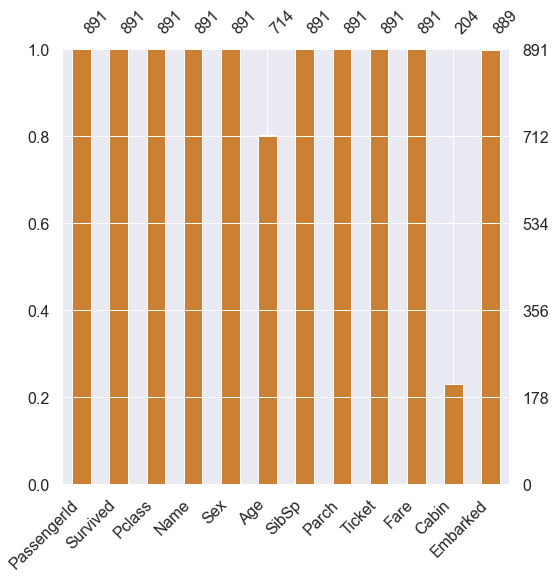

In [9]:
#매트릭스형식의 차트로 데이터 확인 - msno
#바형식(막대형식) - bar
# [:,:] < 전체데이터값으로확인 / figsize 차트의 크기값 / 색상 (rgb형식)

#msno.matrix(df=df_train.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2)) 

msno.bar(df=df_train.iloc[:,:],figsize=(8,8), color=(0.8,0.5,0.2))


#pandas문법_ msno.matrix(data_frame,size,color)
#data.iloc[row,col] ---> index location (데이터의 프레임은 인덱스의 전체를 가져오라는말)

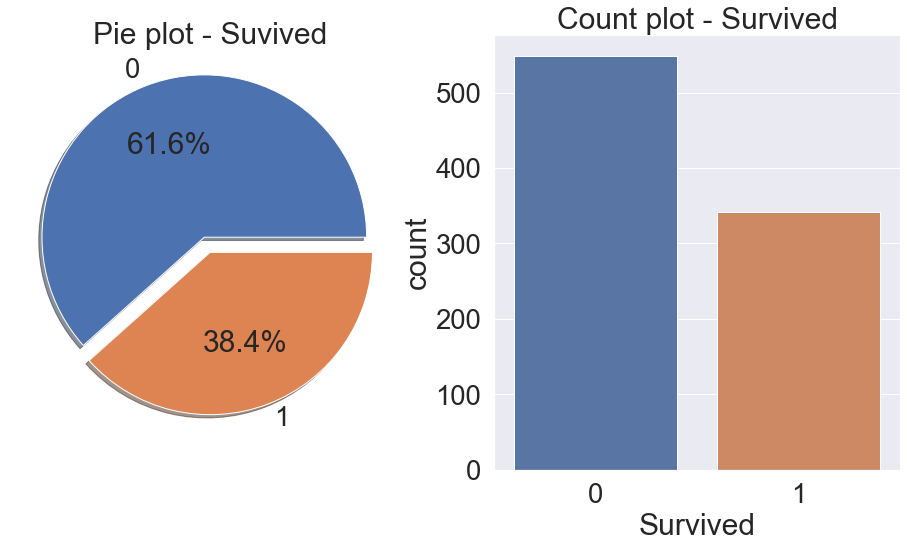

In [10]:
f, ax = plt.subplots(1,2,figsize=(16,8)) #차트를 그려내기전 작업/ 1개의행, 2개의 단락으로 나누어 각각 셋팅

#1번째의 차트 ( ax[0] )

#explode는 쪼개기 %1.1%% : %단위로 포멧
df_train['Survived'].value_counts().plot.pie(explode=[0.1,0], autopct='%1.1f%%', ax=ax[0], shadow=True)
#타이틀셋팅
ax[0].set_title('Pie plot - Suvived') 
#세로라벨이름 ''(공백)으로 없애기
ax[0].set_ylabel('')



#2번째차트(ax[1])

#시본스의 countplot형식의 라이브러리 
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [11]:
df_train['Survived'].value_counts() #각 레이블의 값 갯수 반환

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

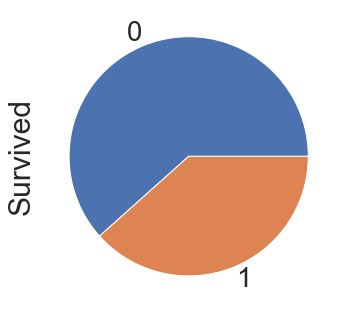

In [12]:
df_train['Survived'].value_counts().plot.pie() #시리즈 데이터타입은 plot을 가지고있음

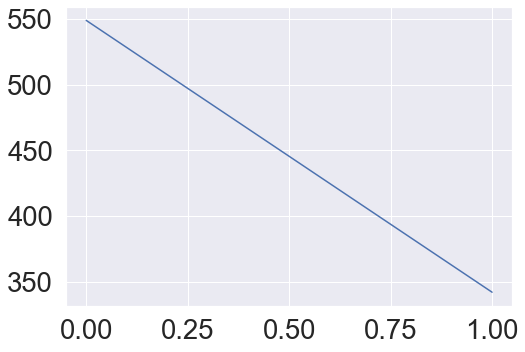

In [13]:
plt.plot(df_train['Survived'].value_counts()) 

In [14]:
#EDA --> 어떤칼럼이 중요한지, 칼럼간에 어떤 상관관계가있는지 확인해보는 작업? /통계적인 인사이트가 중요

<AxesSubplot:xlabel='Pclass'>

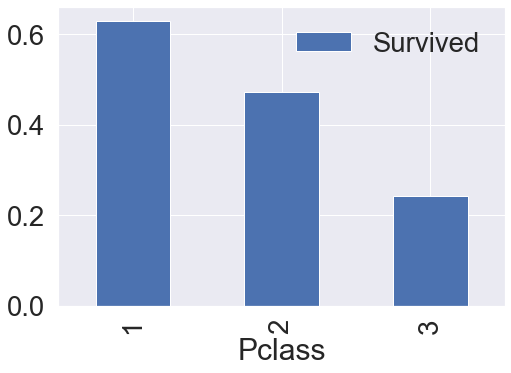

In [15]:
 #클래스별로 생존률이 몇개나있는지 count! // 순서가지정안되어있으면 순서를 지정해줄수있음 : sort_values , ascending=True-오름차순/False-내림차순
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by="Survived",ascending=False).plot.bar()

In [16]:
df_train[['Pclass','Survived']].groupby(['Pclass']).mean() # 객실 들급별 생존율
#.mean() / .sum() /.count()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum() # 객실 등급별 생존자 수

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count() # 객실 등급별 손님 수

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
df_train['Survived'].unique() #값의 고유정보
#df_train['Age'].unique()

array([0, 1])

In [20]:
#각각의 값을 대조하여 표로만든거 / margins => All정보 유무
#pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True) 

pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='cool') #style.background_gradient : 색상변경

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


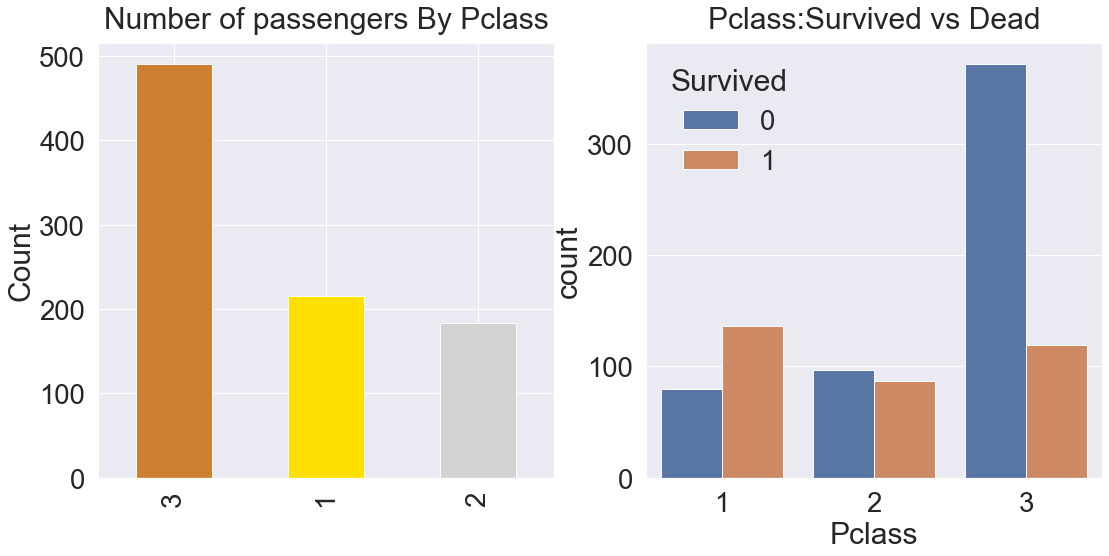

In [21]:
#첫번째 차트 : 클래스별 승객수
#두번째 차트 : 클래스별 생존자 비교


y_position = 1.02 
f, ax = plt.subplots(1,2,figsize=(18,8)) #1개의행에 두개의영역에 차트세팅
df_train['Pclass'].value_counts().plot.bar(color=['#cd7f32','#ffdf00','#d3d3d3'],ax=ax[0]) #pclass데이터의 채워진값의 plot라이브러리의 바형식의 데이터로 차트그리기
ax[0].set_title('Number of passengers By Pclass',y=y_position) #첫번째 차트에 제목세팅
ax[0].set_ylabel('Count') #첫번째 차트에 세로라벨 세팅
sns.countplot('Pclass',hue='Survived',data=df_train, ax=ax[1]) #hue:색상(구분을위해)
ax[1].set_title('Pclass:Survived vs Dead',y=y_position)#두번째차트에 제목셋팅
plt.show() 

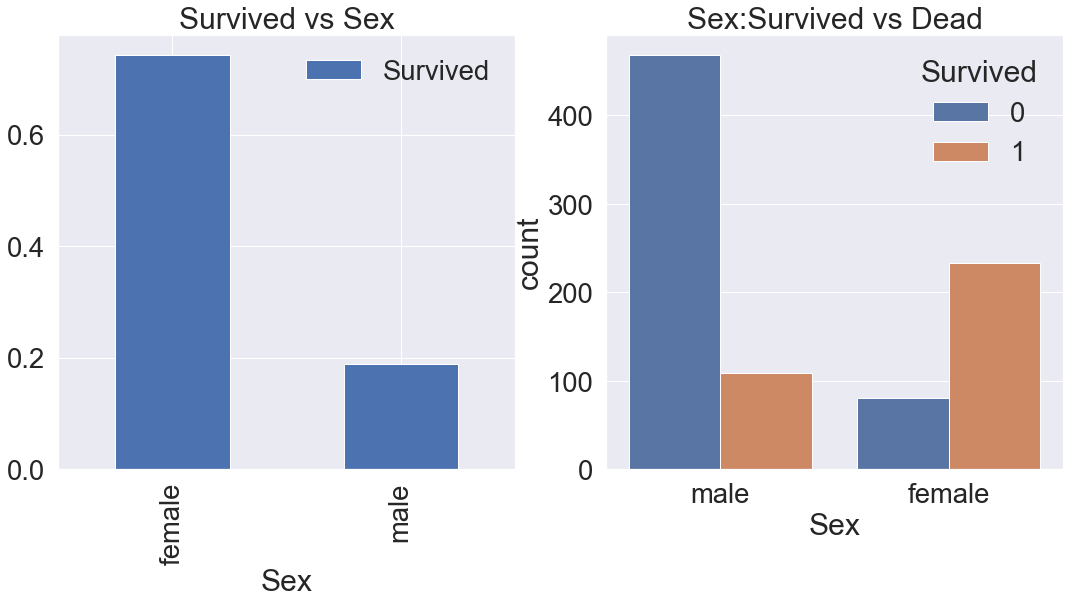

In [22]:
f, ax=plt.subplots(1,2,figsize=(18,8)) #1열2칼럼형태로 차트그려내기위한 초기작업 
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0]) #groupby를이용해 성별과 생존율의 데이터를 성별을기준으로 비교
ax[0].set_title('Survived vs Sex') #첫번째 차트 제목세팅
sns.countplot('Sex',hue='Survived',data=df_train, ax=ax[1]) #두번째 차트 시본스의 countplot형태의 차트로 그려냄
ax[1].set_title('Sex:Survived vs Dead') #두번째 차트의 제목 넣기
plt.show()

In [23]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean() #성별과 생존율을 성별을기준으로 평균값확인

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
#판다스의 crosstab형태의 표양식으로사용 / 스타일포함 (cmap자리에 여러값넣을수있음) /  #margins는 표에 all반환여부
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=False).style.background_gradient(cmap='summer_r')

Survived,0,1
Sex,,
female,81,233
male,468,109


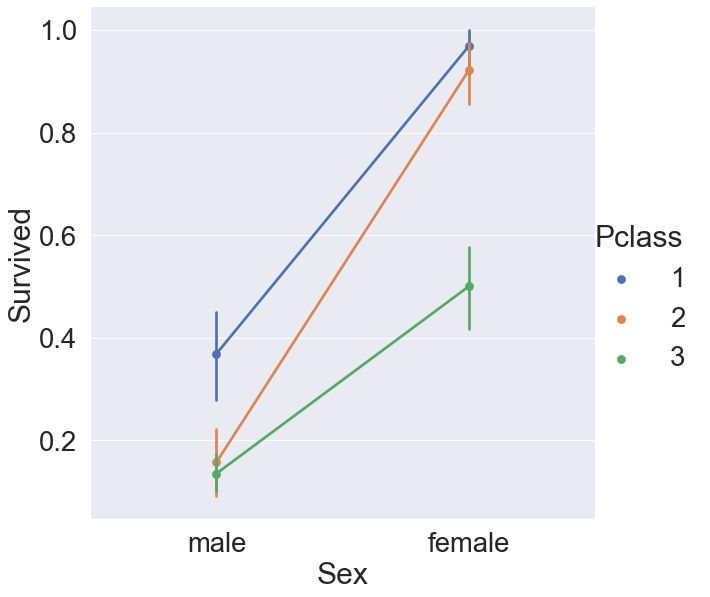

In [25]:
#각각보이게 col='Pclass'
#sns.factorplot(x='Sex',y='Survived',col='Pclass', data=df_train, saturation=.5,size=9,aspect=1)

#hue='Pclass' 를이용해 한곳에 차트모아서 한눈에보기쉽게
sns.factorplot(x='Sex',y='Survived',hue='Pclass', data=df_train, saturation=.5,size=9,aspect=1)

In [26]:
print('제일나이많은 탑승객: {:.1f} years'.format(df_train['Age'].max()))
print('제일어린탑승객 : {:.2f}Years'.format(df_train['Age'].min()))
print('탑승객평균나이 : {:.1f}Years'.format(df_train['Age'].mean()))

제일나이많은 탑승객: 80.0 years
제일어린탑승객 : 0.42Years
탑승객평균나이 : 29.7Years


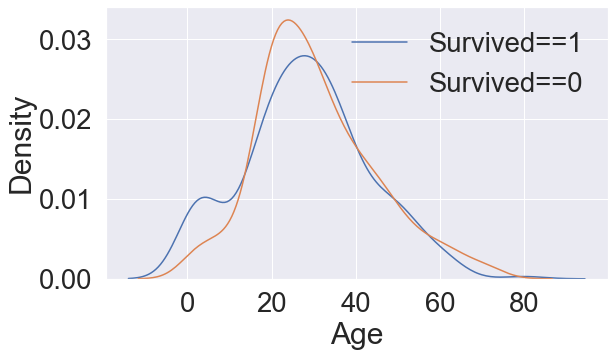

In [27]:
#시본스의 kdeplot라이브러리를 사용해 각각그려냄 나이별 생존율
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]["Age"],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived==1','Survived==0'])
plt.show()